# RNN(순환 신경망, Recurrent Neural Network) 
- [런타임] - [런타임유형변경] - [하드웨어 가속기] - GPU 설정 
- 음성을 인식하거나 문장을 번역하는데 사용
- 주식, 온도, 매출과 같이 시간이 지남에 따라 변화하는 시계열 데이터를 활용하여 미래 주식 종가, 날씨, 상점의 매출을 예측할 수 있다.

## RNN(순환 신경망, Recurrent Neural Network) 

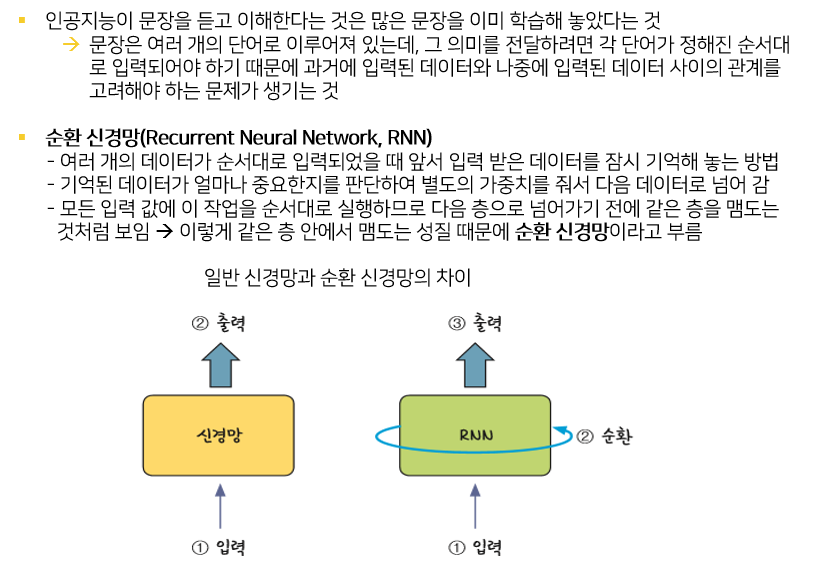

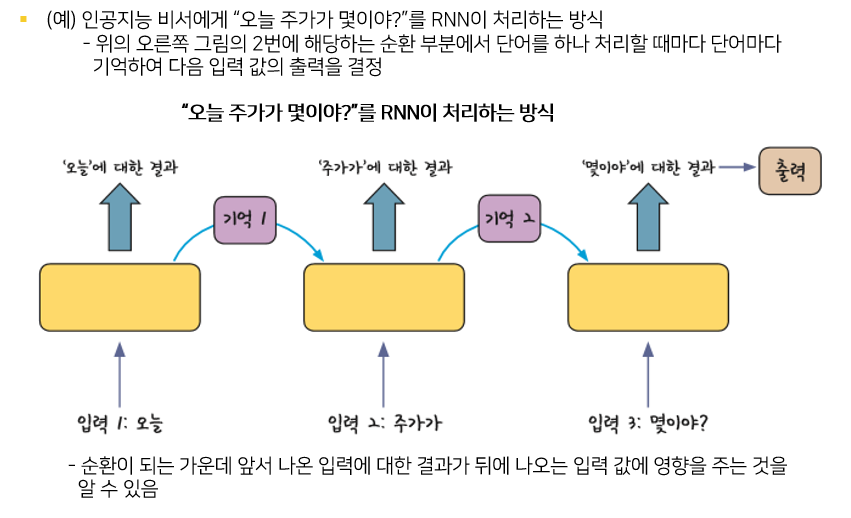

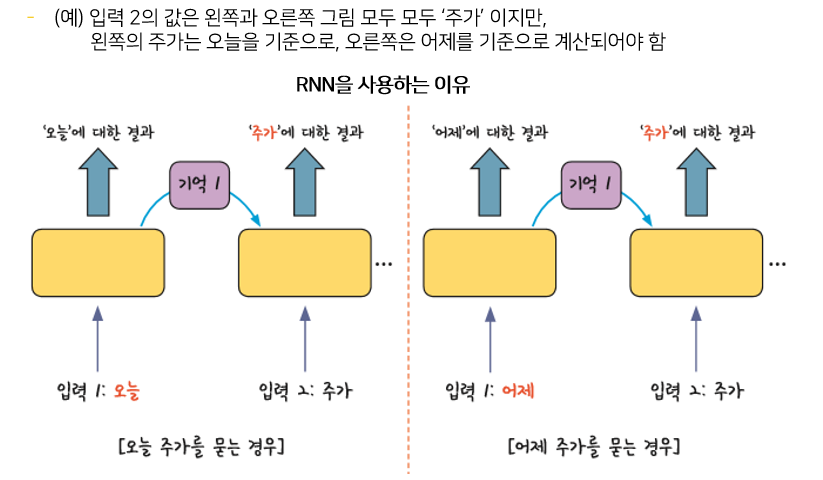

## LSTM(Long Short Term Memory)

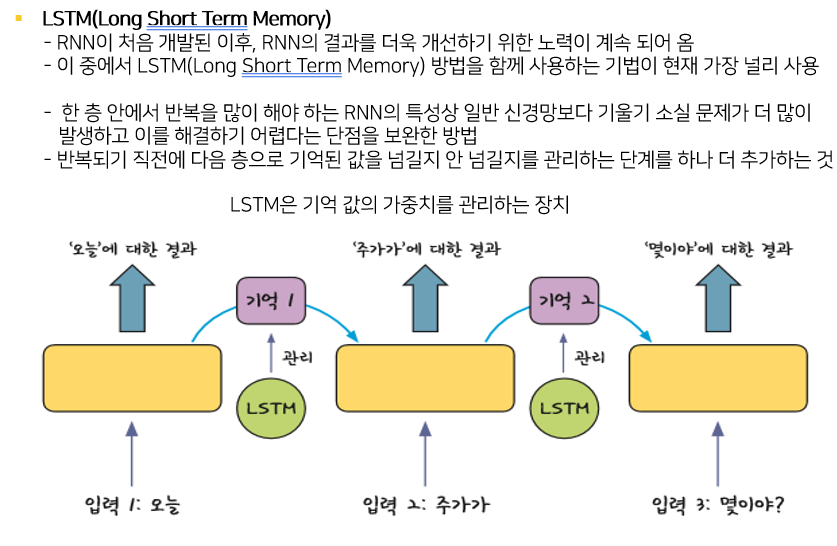

## RNN의 장점

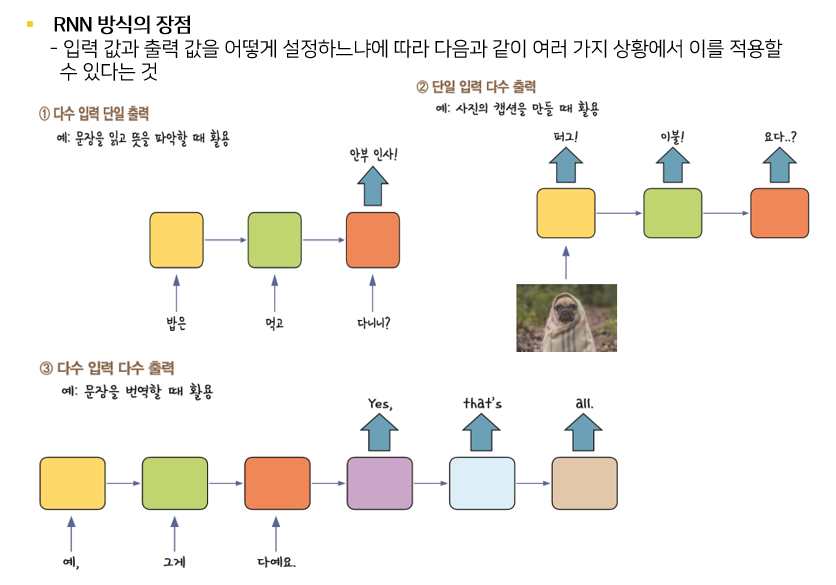

# LSTM 실습

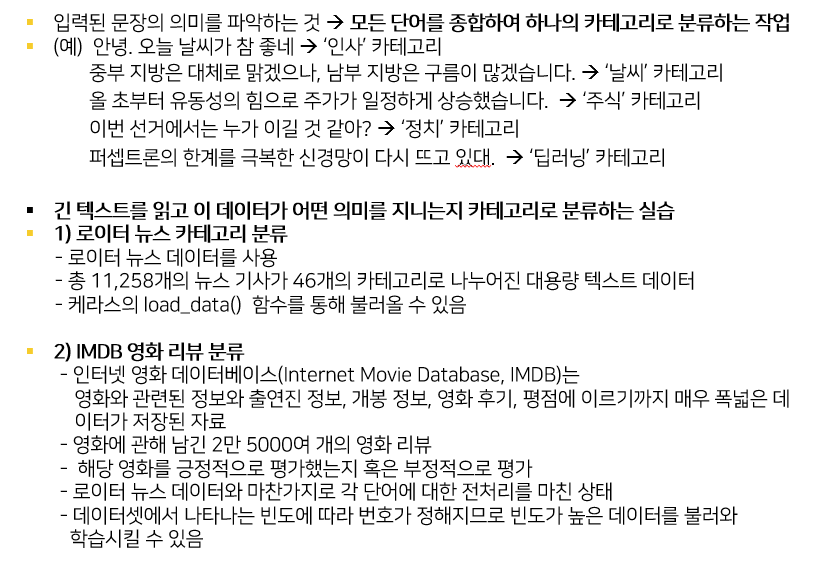

## 1) LSTM을 이용한 로이터 뉴스 카테고리 분류

### 로이터 뉴스 데이타셋 불러오기

In [ ]:
# 경고(worning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [1]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

### 학습셋과 테스트셋으로 나누기

- num_words = 1000 : 단어의 빈도가 1 ~ 1000에 해당하는 단어만 선택해서 불러오기
- test_split=0.2 : 20%를 테스트셋, 80% 학습셋

In [2]:
# 학습셋과 테스트셋으로 나누기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2) 

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
x_train.shape, y_train.shape, 

((8982,), (8982,))

In [4]:
x_test.shape, y_test.shape

((2246,), (2246,))

### 데이터 확인하기

In [5]:
x_train[:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [6]:
y_train[:1]

array([3])

In [9]:
# 데이터 확인하기
import numpy as np

category = np.max(y_train) + 1

print('카테고리 개수 : ', category )
print('학습용 뉴스 기사 개수 : ', len(x_train))
print('테스트용 뉴스 기사 개수 :', len(x_test))

print('단어가 나온 빈도(tokenizer() 이용하여 작업 완료) : ')
print(x_train[0])

카테고리 개수 :  46
학습용 뉴스 기사 개수 :  8982
테스트용 뉴스 기사 개수 : 2246
단어가 나온 빈도(tokenizer() 이용하여 작업 완료) : 
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### 데이타 전처리 - 속성, 클래스

### 1) 속성(x) : 각 기사의 단어 수를 통일 --> 전처리 함수 sequence() 사용

In [10]:
from keras.preprocessing import sequence

# 데이타 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100) # 단어수를 100개로 맞추라는 뜻
x_test = sequence.pad_sequences(x_test, maxlen=100)

- maxlen=100 : 단어수를 100개로 맞추라는 뜻
- 기사의 단어수가 100개를 넘으면 100개 단어만 선택하고 나머지 버림
- 100에서 모자랄 때는 0으로 채워서 100개를 만듦

In [11]:
x_train.shape

(8982, 100)

In [12]:
x_test.shape

(2246, 100)

### 2) 클래스(y) : 원핫 인코딩 --> 전처리 함수 np.utils.to_categorical() 함수 이용

In [13]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

### 딥러닝 모델 설정

#### Embedding 층 
- 수많은 단어(또는 토큰)를 벡터 형태로 표현할 수 있기 때문에 텍스트 분류를 위해서 사용하는 가장 기본에 해당하는 층
- 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 함
- Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함<br>


#### LSTM 층
- LSTM은 앞서 설명했듯이 RNN에서 기억 값에 대한 가중치를 제어함
- LSTM(기사당 단어 수, 기타 옵션)의 형태로 적용됨
- LSTM의 활성화 함수로는 tanh를 사용

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  LSTM, Embedding

import tensorflow as tf
import numpy as np

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

model = Sequential()
model.add(Embedding(1000, 100))           # Embedding(불러온 단어의 총 개수, 기사당 단어 수) 
model.add(LSTM(100, activation='tanh'))   # LSTM(기사당 단어 수)
model.add(Dense(46, activation='softmax'))

### 모델 요약

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


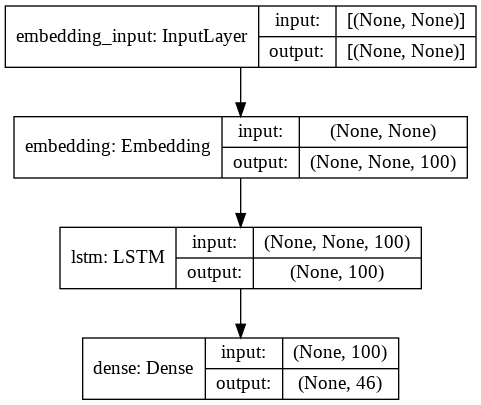

In [17]:
from keras.utils import np_utils
tf.keras.utils.plot_model(model, 'lstm-model.png', show_shapes=True)

### 모델의 컴파일

In [18]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

### 모델의 실행

In [19]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 9s 18ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 12ms/step - loss: 2.0382 - accuracy: 0.4890 - val_loss: 1.9614 - val_accuracy: 0.5085
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 1.9208 - accuracy: 0.5086 - val_loss: 1.8052 - val_accuracy: 0.5472
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7575 - accuracy: 0.5478 - val_loss: 1.7328 - val_accuracy: 0.5574
Epoch 5/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6809 - accuracy: 0.5708 - val_loss: 1.6968 - val_accuracy: 0.5735
Epoch 6/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6152 - accuracy: 0.5887 - val_loss: 1.6733 - val_accuracy: 0.5931
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 1.5407 - accuracy: 0.6134 - val_loss: 1.5822 - val_accuracy: 0.6073
Epoch 8/20
90

### 테스트 정확도 출력

In [20]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2722 - accuracy: 0.7102

 Test Accuracy: 0.7102


### 그래프로 표시하기

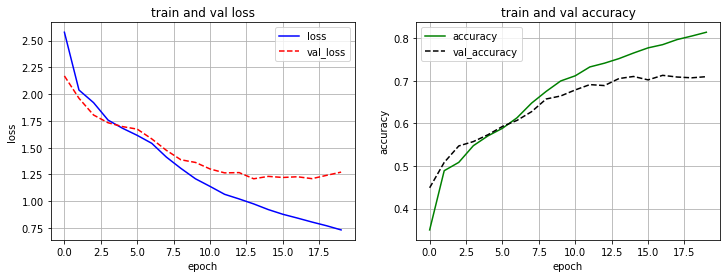

In [21]:
# 학습 결과 그래프로 표시하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# train and val loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.plot(history.history['val_loss'], 'r--', label='val_loss')

ax1.legend()
ax1.grid()
ax1.set_title('train and val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

# train and val accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], 'g-', label='accuracy')
ax2.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

ax2.legend()
ax2.grid()
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.show()

### 전체 코드